In [2]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter


# from sklearn import cross_validation
# from sklearn import linear_model
# from sklearn import ensemble
# from IPython.core.display import HTML


In [3]:
data_complete = pd.read_csv('Source/listings_SF_Airbnb_2018.csv', nrows=1000, error_bad_lines=False)
data_complete.fillna(0, inplace=True)

# price = data_complete['price']
# prices=[]

# for p in price:
#     p=float(p[1:].replace(',',''))
#     prices.append(p)

# data_complete['price']=prices

# data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24
5,8567,https://www.airbnb.com/rooms/8567,20181206023014,2018-12-06,Lovely 2BR flat Great Location,0,"Fully furnished 2BR, 1BA flat in beautiful Vic...","Fully furnished 2BR, 1BA flat in beautiful Vic...",none,"The neighborhood is very centrally located, cl...",...,t,STR-0000278,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,0.27
6,8739,https://www.airbnb.com/rooms/8739,20181206023014,2018-12-06,"Mission Sunshine, with Private Bath","Welcome to San Francisco's Mission District, t...","Your sunny room has a queen size bed, and look...","Welcome to San Francisco's Mission District, t...",none,Located between Valencia Street and Dolores Pa...,...,t,STR-0000028,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,2,5.54
7,9225,https://www.airbnb.com/rooms/9225,20181206023014,2018-12-06,Artful Potrero Separate Floor with Garden,A Unique Guest Suite! A Spacious Art Filled ...,"It is unique, very spacious [800 sq. ft. with...",A Unique Guest Suite! A Spacious Art Filled ...,none,"It is a distinct neighborhood, with easy acces...",...,t,STR-0000179,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,3.91
8,10251,https://www.airbnb.com/rooms/10251,20181206023014,2018-12-06,Victorian Suite in Inner Mission,0,Please read this before you book! Second floor...,Please read this before you book! Second floor...,none,"Neighborhood is safe, sunny, lively and fun. ...",...,t,STR-0001558,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,2.73
9,10578,https://www.airbnb.com/rooms/10578,20181206023014,2018-12-06,Classic Nob Hill Studio - Roof Deck,A cute studio with nice street views and lots ...,"Features: Elevator, Wood floors, TV, DVD Play...",A cute studio with nice street views and lots ...,none,"Very centrally located. Fishermans Wharf, Chi...",...,t,0,"{""SAN FRANCISCO""}",f,f,moderate,f,t,1,0.21


In [4]:
for col in data_complete.columns: 
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

In [5]:
#Replace NaN 
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [6]:
#Create a df from columns need for analysis
NYC_listing_df = data_complete[['host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,1.0,...,0.0,$170.00,1,3,4,5,74,172,97.0,10.0
1,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,2.0,...,0.0,$235.00,2,30,60,90,365,112,98.0,9.0
2,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,1.0,...,0.0,$65.00,10,30,60,90,365,17,85.0,8.0
3,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,1.0,...,0.0,$65.00,10,30,60,90,365,8,93.0,9.0
4,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,2.0,...,0.0,$785.00,2,30,60,89,89,27,97.0,9.0
5,25601,f,Western Addition/NOPA,San Francisco,CA,Apartment,Entire home/apt,6,1,2.0,...,0.0,$255.00,1,0,5,5,20,31,90.0,9.0
6,7149,t,Mission District,San Francisco,CA,Condominium,Private room,3,1,1.0,...,0.0,$139.00,2,9,28,49,129,631,98.0,9.0
7,29674,f,Potrero Hill,San Francisco,CA,House,Private room,2,1,1.0,...,0.0,$135.00,1,20,47,67,342,434,94.0,9.0
8,35199,t,Mission District,San Francisco,CA,Apartment,Entire home/apt,6,1,2.0,...,0.0,$265.00,1,2,21,51,303,307,96.0,9.0
9,37049,f,0,San Francisco,CA,Apartment,Entire home/apt,2,1,0.0,...,0.0,$120.00,1,30,60,90,365,18,99.0,10.0


In [123]:
SF_listing_df = SF_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

SF_listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24


In [124]:
#Breakdown by the number of listings per neighbourhood
SF_neighbourhoods = SF_listing_df.loc[:,'neighbourhood_cleansed'].value_counts()
SF_neighbourhoods.head()

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: neighbourhood_cleansed, dtype: int64

In [125]:
# new_SF_neighbourhoods = SF_neighbourhoods.drop("Not Specified")
# new_SF_neighbourhoods.head()

In [126]:
SF_neighbourhoods = pd.DataFrame(SF_neighbourhoods)
SF_neighbourhoods.head()

,neighbourhood_cleansed
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [127]:
new_SF_neighbourhoods = SF_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
new_SF_neighbourhoods.head()

,Number of Listings
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [128]:
#new_SF_neighbourhoods['Number of Listings'].sum()

In [129]:
top_SF_neighbourhoods = new_SF_neighbourhoods['Number of Listings'][:5]
top_SF_neighbourhoods

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: Number of Listings, dtype: int64

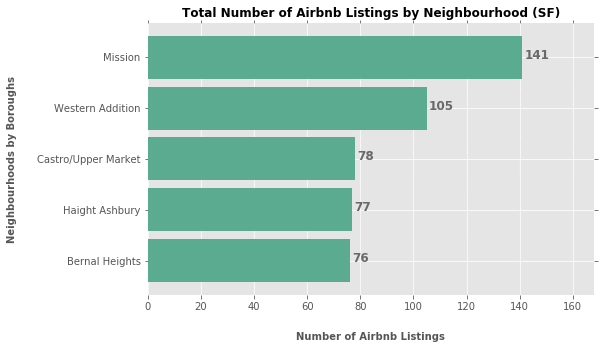

In [130]:
ax = top_SF_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#5BAB90', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by Neighbourhood (SF)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()

# totals = []

# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# # set individual bar lables using above list
# total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.8, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
    
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(vals1)

In [131]:
top_SF_neighbourhoods_by_city = SF_listing_df.loc[:,'City'].value_counts()
top_SF_neighbourhoods_by_city

San Francisco                  998
Daly City                        1
San Francisco, Hayes Valley      1
Name: City, dtype: int64

In [132]:
top_SF_neighbourhoods_by_city = pd.DataFrame(top_SF_neighbourhoods_by_city)
top_SF_neighbourhoods_by_city

,City
San Francisco,998
Daly City,1
"San Francisco, Hayes Valley",1


In [18]:
top_SF_neighbourhoods_by_city = top_SF_neighbourhoods_by_city.rename(columns={'City': "Number of Listings"})
top_SF_neighbourhoods_by_city.head()
#top_NYC_neighbourhoods_by_city.sum()

,Number of Listings
San Francisco,998
Daly City,1
"San Francisco, Hayes Valley",1


In [19]:
top5_SF_neighbourhoods_by_city = top_SF_neighbourhoods_by_city['Number of Listings'][:5]
top5_SF_neighbourhoods_by_city

San Francisco                  998
Daly City                        1
San Francisco, Hayes Valley      1
Name: Number of Listings, dtype: int64

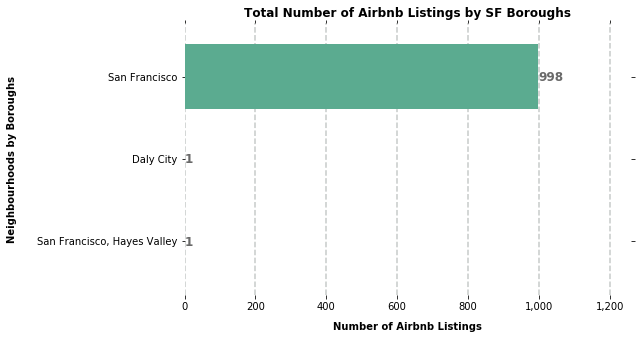

In [20]:
ax = top5_SF_neighbourhoods_by_city.plot(kind='barh', figsize=(8, 5), color= '#5BAB90', zorder=4, width=0.80)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.5, color='#8F9593', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by SF Boroughs",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.6, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
    
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

In [ ]:
#How well can we predict a listing's price and what features correlate well with the pricing?¶

In [63]:
# SF_listing_df.property_type.unique()

features_df = data_complete.copy()

In [64]:
# checking if the target label has all entries recorded
features_df.price.count()

1000

In [65]:
features_df.shape

(1000, 96)

In [66]:
# categorizing number of listings with room type
room_type_count = features_df.room_type.value_counts()

In [67]:
room_type_count

Entire home/apt    639
Private room       335
Shared room         26
Name: room_type, dtype: int64

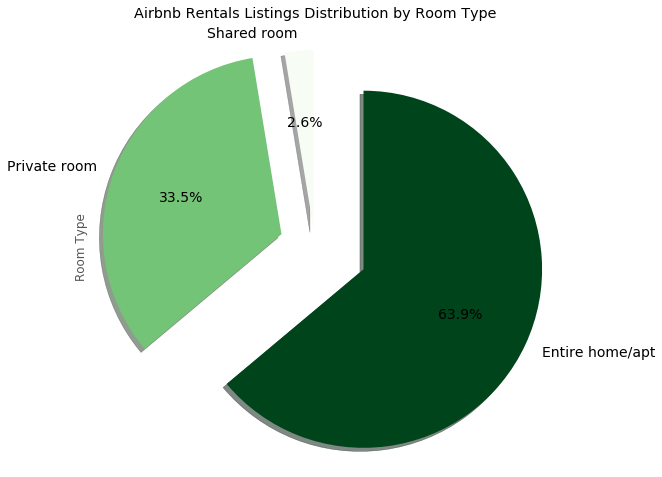

In [70]:
matplotlib.style.use('ggplot')

room = data_complete.room_type
r = Counter(room)

explode = (0.1, 0.2, 0.3)

room_type_count = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_type_count.columns = ['Room Type']
room_type_count.plot.pie(y = 'Room Type', colormap = 'Greens', figsize=(8,10), explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,fontsize = 14, legend = False, title = 'Airbnb Rentals Listings Distribution by Room Type')




In [71]:
# clean property type column
features_df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Guest suite',
       'Loft', 'Cottage', 'Hostel', 'Guesthouse', 'Serviced apartment',
       'Bungalow', 'Boutique hotel', 'Bed and breakfast', 'Hotel',
       'Cabin'], dtype=object)

In [72]:
features_df = features_df[features_df.property_type != 0]

In [73]:
# number of listings based on the property type
property_type_count = features_df.property_type.value_counts()

In [74]:
property_type_count

Apartment             433
House                 278
Condominium           112
Guest suite            75
Loft                   26
Townhouse              18
Serviced apartment     17
Guesthouse             12
Hostel                 11
Hotel                   6
Cottage                 4
Bungalow                4
Boutique hotel          2
Cabin                   1
Bed and breakfast       1
Name: property_type, dtype: int64

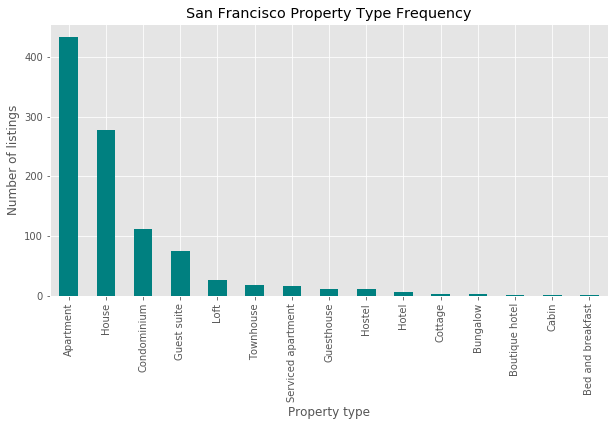

In [103]:
#calculating SF property type frequency to find the most popular one as well as the factors that create a demand for that specific property types.
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'San Francisco Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [87]:
SF_listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24


In [89]:
SF_neighbourhood_total = len(SF_listing_df['neighbourhood'].unique())
SF_neighbourhood_total

50

In [90]:

set(data_complete['neighbourhood'])

{0,
 'Alamo Square',
 'Balboa Terrace',
 'Bayview',
 'Bernal Heights',
 'Chinatown',
 'Civic Center',
 'Cole Valley',
 'Cow Hollow',
 'Crocker Amazon',
 'Daly City',
 'Diamond Heights',
 'Dogpatch',
 'Duboce Triangle',
 'Excelsior',
 'Financial District',
 "Fisherman's Wharf",
 'Glen Park',
 'Haight-Ashbury',
 'Hayes Valley',
 'Ingleside',
 'Inner Sunset',
 'Japantown',
 'Lakeshore',
 'Lower Haight',
 'Marina',
 'Mission District',
 'Mission Terrace',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Oceanview',
 'Outer Sunset',
 'Pacific Heights',
 'Parkside',
 'Portola',
 'Potrero Hill',
 'Presidio Heights',
 'Richmond District',
 'Russian Hill',
 'SoMa',
 'South Beach',
 'Sunnyside',
 'Telegraph Hill',
 'Tenderloin',
 'The Castro',
 'Twin Peaks',
 'Union Square',
 'West Portal',
 'Western Addition/NOPA'}

In [111]:
#distribution of price in each neighbourhood_group and across all.
data_complete.groupby('neighbourhood')['price'].describe()

,count,unique,top,freq
neighbourhood,,,,
0,96,65,$200.00,4
Alamo Square,26,20,$100.00,2
Balboa Terrace,8,8,$225.00,1
Bayview,12,11,$60.00,2
Bernal Heights,65,45,$90.00,5
Chinatown,14,4,$30.00,11
Civic Center,4,4,$158.00,1
Cole Valley,13,10,$65.00,4
Cow Hollow,6,6,$345.00,1


In [112]:
#Next variable to be studied is “minimum_nights”
data_complete.groupby('neighbourhood')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
0,96.0,18.718750,14.323116,1.0,2.00,30.0,30.00,60.0
Alamo Square,26.0,19.692308,13.352960,2.0,3.00,30.0,30.00,30.0
Balboa Terrace,8.0,2.625000,1.060660,2.0,2.00,2.0,3.00,5.0
Bayview,12.0,25.500000,24.515301,1.0,2.50,30.0,30.00,90.0
Bernal Heights,65.0,10.492308,12.216949,1.0,2.00,3.0,30.00,30.0
Chinatown,14.0,28.357143,6.147009,7.0,30.00,30.0,30.00,30.0
Civic Center,4.0,30.000000,0.000000,30.0,30.00,30.0,30.00,30.0
Cole Valley,13.0,19.923077,14.614271,1.0,3.00,30.0,32.00,32.0
Cow Hollow,6.0,20.833333,14.232592,1.0,10.50,30.0,30.00,30.0


In [93]:

# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(data_complete['neighbourhood_cleansed'])

nh

Counter({'Western Addition': 105,
         'Bernal Heights': 76,
         'Haight Ashbury': 77,
         'Mission': 141,
         'Potrero Hill': 40,
         'Nob Hill': 16,
         'Marina': 30,
         'Downtown/Civic Center': 25,
         'Castro/Upper Market': 78,
         'Inner Sunset': 16,
         'South of Market': 50,
         'Noe Valley': 48,
         'Presidio Heights': 7,
         'Outer Richmond': 24,
         'Glen Park': 11,
         'Twin Peaks': 7,
         'Ocean View': 6,
         'Pacific Heights': 20,
         'Financial District': 21,
         'Russian Hill': 16,
         'Outer Sunset': 17,
         'North Beach': 21,
         'Inner Richmond': 31,
         'Excelsior': 28,
         'Seacliff': 3,
         'Chinatown': 15,
         'West of Twin Peaks': 18,
         'Bayview': 14,
         'Diamond Heights': 2,
         'Outer Mission': 25,
         'Parkside': 4,
         'Golden Gate Park': 2,
         'Lakeshore': 1,
         'Crocker Amazon': 4,
        

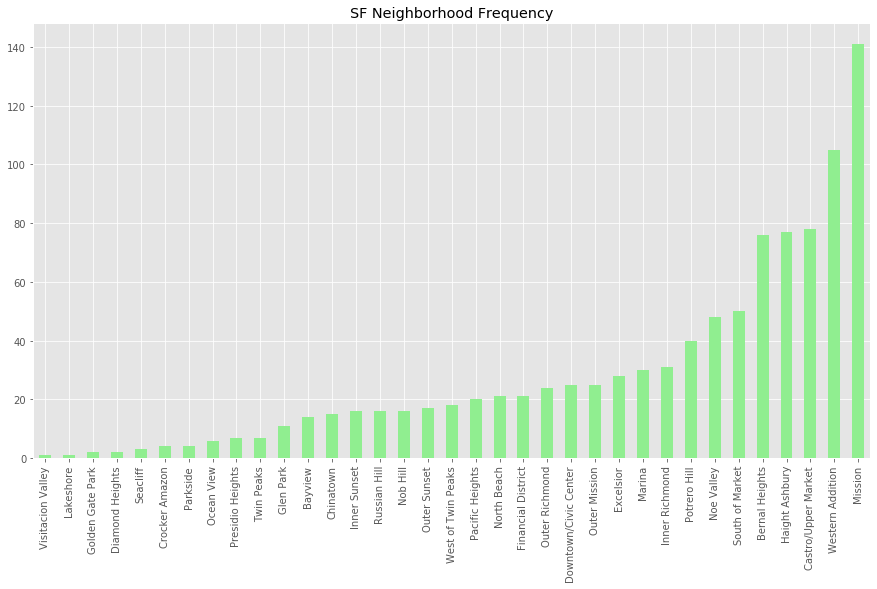

In [94]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightGreen', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = False)

In [95]:
#It looks like Mission has the most listings, followed by Western Addition, South of Market, and Castro/Upper Market. 
#We will now analyze the average listing on SF, 
#then further break it down for each neighborhood to understand the pricing breakdown.

In [96]:
# extracting the names
neighborhood_names = list(nh.keys())

# 2 column table of neighborhood names and prices
nh_prices = data_complete[['neighbourhood_cleansed', 'price']]
nh_prices.columns = ['neighbourhood', 'price']

# we pick out the rows which have neighborhood names with 400+ listings.
nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]

# # # group by neighbourhood and then aggreate the prices based on mean
# # nh_prices_group = nh_prices.groupby('neighbourhood')
# # # nh_prices = nh_prices_group['price'].agg(np.mean)

# # # # turn dictionary's keys and values into a table for easy read
# # nh_prices = nh_prices.reset_index()
# nh_prices['number of listings'] = nh.values()

nh_prices

,neighbourhood,price
0,Western Addition,$170.00
1,Bernal Heights,$235.00
2,Haight Ashbury,$65.00
3,Haight Ashbury,$65.00
4,Western Addition,$785.00
5,Western Addition,$255.00
6,Mission,$139.00
7,Potrero Hill,$135.00
8,Mission,$265.00
9,Nob Hill,$120.00


In [97]:
# Calcvulating the Average number of the reviews for each listing
np.mean(data_complete.reviews_per_month)

1.478499999999999

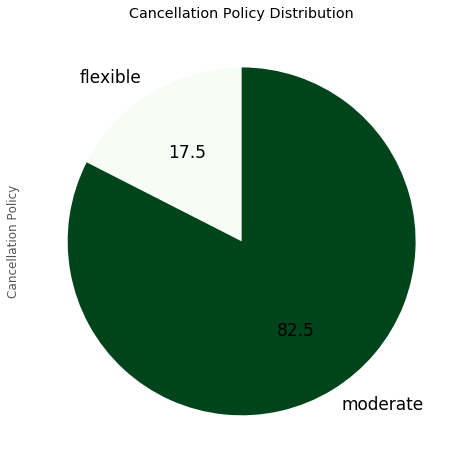

In [98]:
#Calculating average of the cancelation policy. For thr4e majority of listings the cancelation policy is moderate, meannig that
#most of the listings will require certain amount of time given to the potential renter in ordser to cancel the booking.
cancel = data_complete.cancellation_policy
c = Counter(cancel)

# cleaning up small values

c.pop("super_strict_30", None)
c.pop("super_strict_60", None)
c.pop("strict_14_with_grace_period", None)
c.pop("strict", None)


cancel_df = pd.DataFrame.from_dict(c, orient='index').sort_values(by=0)
cancel_df.columns = ['Cancellation Policy']
cancel_df.plot.pie(y = 'Cancellation Policy',
                   colormap = 'Greens',
           
                   figsize=(8,8), 
                   fontsize = 17,
                   startangle=90,
                   
                   autopct = '%.1f',
                   legend = False,
                  
                   title = "Cancellation Policy Distribution")

# explode = (0.1, 0.2, 0.3)

# room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
# room_df.columns = ['Room Type']
# room_df.plot.pie(y = 'Room Type', colormap = 'Greens', figsize=(8,10), explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,fontsize = 14, legend = False, title = 'Airbnb Rentals Listings Distribution by Room Type')


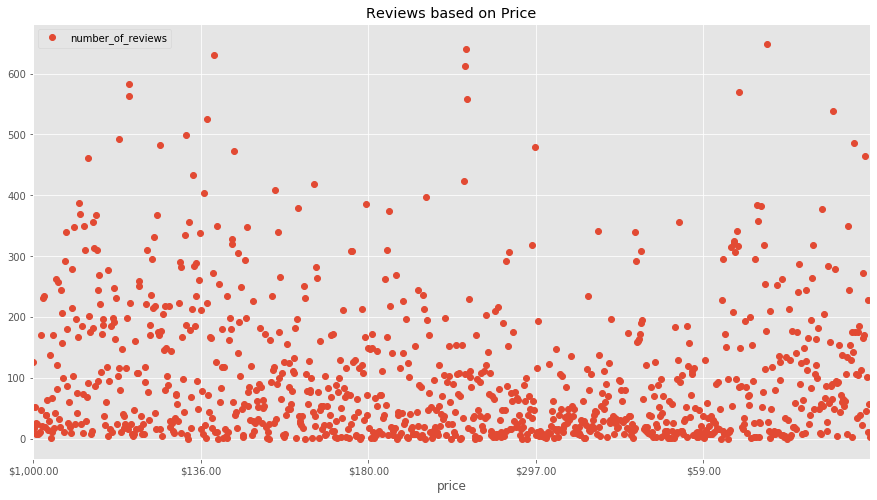

In [99]:
price_review = data_complete[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(15,8),
                  legend = 'best',
                  title = 'Reviews based on Price')
# plt.legend(loc='best')
# plt.xticks(rotation=90)

In [141]:
summary = data_complete[['summary']]

# gets rid of NaN values with pandas' notnull function
summary = summary[pd.notnull(summary['summary'])]
summary



,summary
0,Our bright garden unit overlooks a grassy back...
1,0
2,Nice and good public transportation. 7 minute...
3,Nice and good public transportation. 7 minute...
4,Pls email before booking. Interior featured i...
5,0
6,"Welcome to San Francisco's Mission District, t..."
7,A Unique Guest Suite! A Spacious Art Filled ...
8,0
9,A cute studio with nice street views and lots ...


In [138]:
words = []

# accessing each summary, then each word, and putting it into an empty list
for detail in summary['summary']:
    if detail != 0:
        for word in detail.split():
            words.append(word)

# turning the list into a counter (dictionary) for frequency, then into a pandas dataframe
words = Counter(words)
word_count = pd.DataFrame.from_dict(words, orient='index').sort_values(by=0)

# renaming the column
word_count.columns = ['summary']

# sorting it from highest to lowest
word_count = word_count.sort_values(by=['summary'], ascending=False)
word_count

,summary
and,1523
the,1357
a,1127
to,946
in,918
of,779
with,647
is,570
for,351
from,319


In [100]:
data = data_complete[['price',
           'room_type',
           'accommodates',
           'bathrooms',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'instant_bookable',
           'cancellation_policy',
           'amenities']]

In [89]:

data

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,instant_booking_t,Entire home/apt,Private room,Shared room
0,$170.00,3,1,1.0,2,97.0,22,0,1,0,0,0,1,1,0,0
1,$235.00,5,1,2.0,3,98.0,10,0,0,0,1,0,0,1,0,0
2,$65.00,2,4,1.0,1,85.0,18,0,0,0,1,0,0,0,1,0
3,$65.00,2,4,1.0,1,93.0,15,0,0,0,1,0,0,0,1,0
4,$785.00,5,1.5,2.0,2,97.0,9,0,0,0,1,0,0,1,0,0
5,$255.00,6,1,2.0,3,90.0,29,0,1,0,0,0,0,1,0,0
6,$139.00,3,1,1.0,2,98.0,39,0,0,0,1,0,0,0,1,0
7,$135.00,2,1,1.0,1,94.0,21,0,0,0,1,0,0,0,1,0
8,$265.00,6,1,2.0,3,96.0,22,0,1,0,0,0,0,1,0,0
9,$120.00,2,1,0.0,1,99.0,7,0,1,0,0,0,0,1,0,0
